一、Models.py
==================
Models.py 是用來做 DB 的欄位用的

關於 Models.py 的 DB 建立的欄位資料: https://docs.djangoproject.com/en/2.1/ref/models/fields/

In [ ]:
# blog/models.py
from django.db import models


class Comment(models.Model): # 在 db 內新增 Comment 的 table
    # 不用建 id，id 自動會有
    name = models.CharField(max_length=50) # 新增一個 char(50) 的欄位 name
    content = models.TextField() # 新增一個 text 的欄位 cotent
    createTime = models.DateTimeField(auto_now_add=True) # 新增一個時間欄位，而當資料被 create 時，這筆資料的 createTime 會存當下的時間

然後在 cmd 執行以下指令，做出 db 所需要的 migrations 檔，這些檔案是用來管理 DB 的版本控制
* python manage.py makemigrations

再來就是真正更改 DB tables 與 fields
* python manage.py migrate

執行完後，用 sqlitespy.exe 可以開啟 db.sqlite3 檔

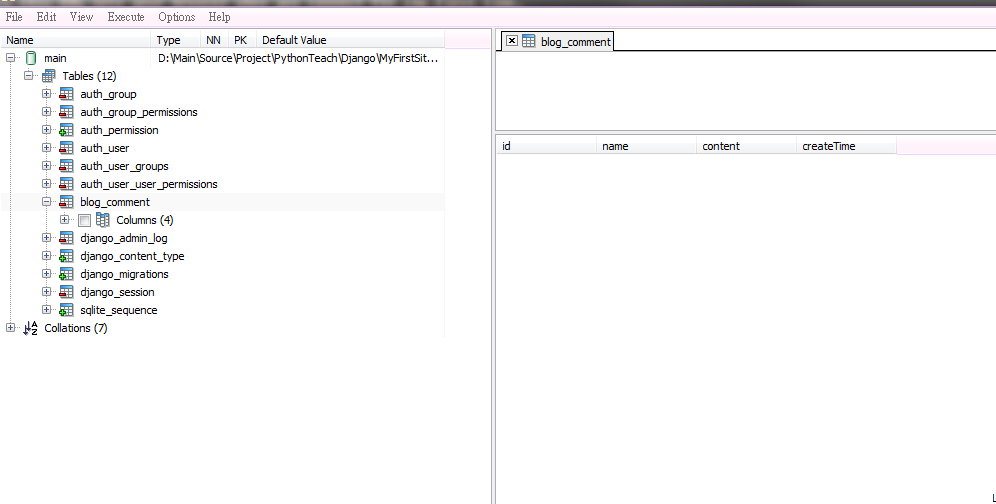

In [1]:
from IPython.display import Image
Image("images/P9.png")

二、Django ORM
===================
Django ORM 是一個方便的工具，我們可以不用下任何的 sql 語言就能對 db 做操作

* Django ORM: https://docs.djangoproject.com/en/2.1/topics/db/queries/
* ORM queryset: https://docs.djangoproject.com/en/2.1/ref/models/querysets/

以下以留言功能實作來舉例

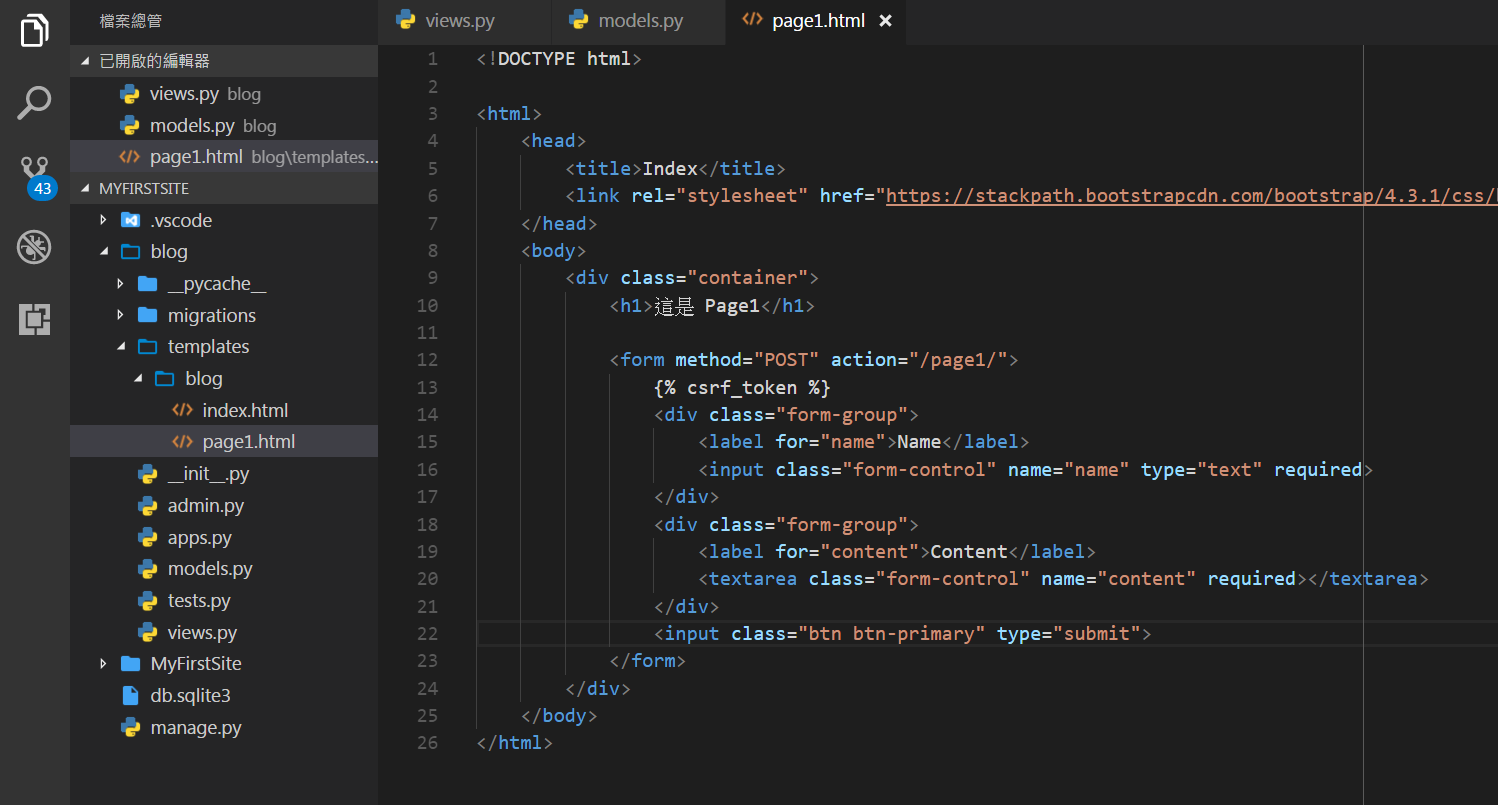

In [4]:
from IPython.display import Image
Image("images/P10.png")

In [ ]:
# blog/views.py
from blog.models import Comment

def page1(request):
    if request.POST:  # 判斷是否是 POST
        name = request.POST.get("name")
        content = request.POST.get("content")

        comment = Comment.objects.create(  # 在 db 內新增一筆 Comment
            name=name,
            content=content,
        )
    
    return render(request, 'blog/page1.html')

runserver 後，試試看表單 POST 看看

可能出現問題(403 Forbidden)，因為 Django 的安全機制的關係，不允許隨便 POST 資料進來，如果要讓 Django 能夠接受我們 POST 的資料，需要在 form 上面加上 {% csrf_token %}

加完後繼續 POST 看看

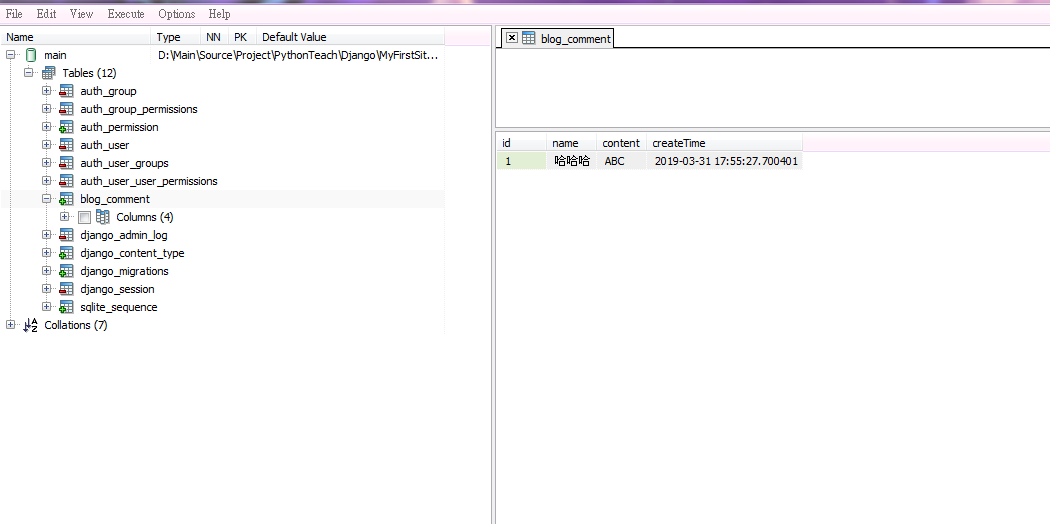

In [5]:
from IPython.display import Image
Image("images/P11.png")

三、Template 語法
=======================
目前我們寫的 html 檔都叫做 template，是組成網頁的前身，我們會在 template 當中寫類似程式碼的東西，用來 render 我們想要的結果

* Template 可用的語法: https://docs.djangoproject.com/en/2.1/ref/templates/builtins/

In [ ]:
# blog/views.py
from blog.models import Comment

def page1(request):
    if request.POST:  # 判斷是否是 POST
        name = request.POST.get("name")
        content = request.POST.get("content")

        comment = Comment.objects.create(  # 在 db 內新增一筆 Comment
            name=name,
            content=content,
        )

    context = {
        "comments": Comment.objects.all() # select * from Comment;
    }
    return render(request, 'blog/page1.html', context)

在 html 內加入以下程式碼

In [ ]:
<ul>
    {% for comment in comments %}
    <li>
        {{ comment.name }}: {{ comment.content }}
    </li>
    {% endfor %}
</ul>

開啟 server 觀看頁面結果

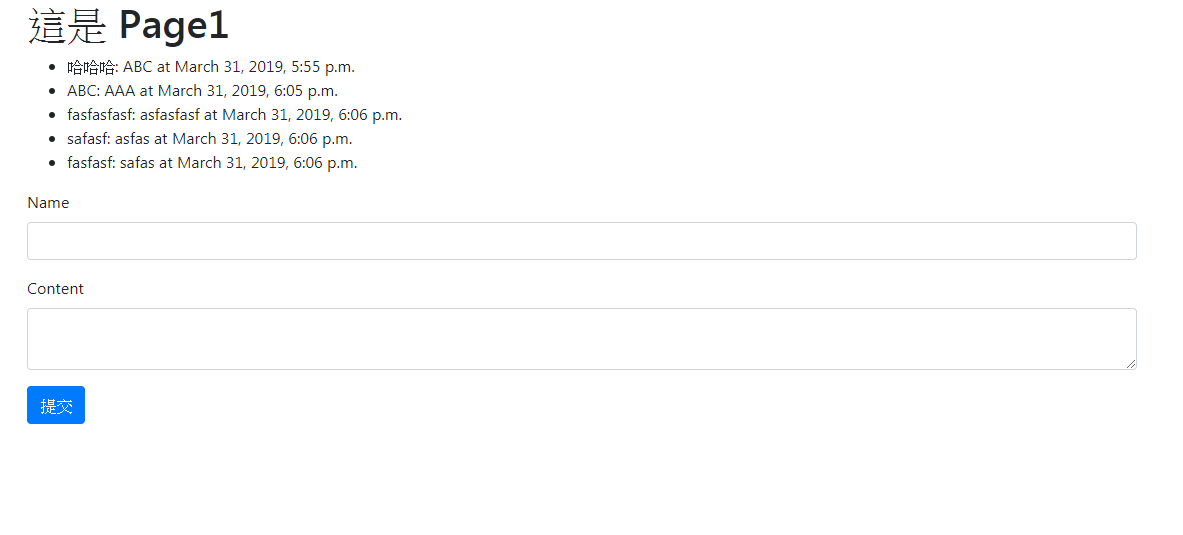

In [7]:
from IPython.display import Image
Image("images/P12.png")